#파일 불러오기

In [2]:
#구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import re
##데이터 불러오기
data_path = ("/content/drive/MyDrive/Kmong_project/요타/sample+data.csv")
data = pd.read_csv(data_path,encoding="UTF-8")
data = data.drop("sec",axis =1 ) #필요없는 col 제거

#데이터 전처리

데이터의 기본적 통계

In [4]:
data.describe()

,t1 success,t2 success,N t1 wp,N t1 accordance,line A diff,line B diff,N t2 wp,N t2 accordance,N t2 O(1)/U(0),TOTAL A diff,TOTAL B diff,diff line,DIFF total
count,1787.000000,1787.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000
mean,0.496922,0.495243,68.151787,0.911322,-1.951462,-0.029524,56.381655,0.698829,0.450641,-0.305039,0.156797,-1.921937,-0.461835
std,0.500130,0.500117,11.004550,0.284358,4.129302,4.103305,4.686020,0.458895,0.497697,47.644443,47.677586,1.156465,2.453548
min,0.000000,0.000000,50.769231,0.000000,-20.981013,-19.788518,50.769231,0.000000,0.000000,-1987.639692,-1989.744047,-5.303937,-10.522127
25%,0.000000,0.000000,58.461538,1.000000,-4.553334,-2.624484,53.076923,0.000000,0.000000,-4.676982,-4.075521,-2.797398,-2.035777
50%,0.000000,0.000000,67.692308,1.000000,-1.669314,0.352407,55.384615,1.000000,0.000000,1.143031,1.792529,-1.927587,-0.372490
75%,1.000000,1.000000,76.923077,1.000000,0.826617,2.771889,59.230769,1.000000,1.000000,6.458259,6.865078,-1.020480,1.188011
max,1.000000,1.000000,96.153846,1.000000,9.999748,12.741796,79.230769,1.000000,1.000000,26.657622,24.375330,1.338876,6.812605


TOTAl A diff, TOTAL B diff 에 이상치 존재 확인하여 제거

In [5]:
data[data["TOTAL A diff"] == -1987.639692]

,t1 success,t2 success,N t1 wp,N t1 accordance,line A diff,line B diff,N t2 wp,N t2 accordance,N t2 O(1)/U(0),TOTAL A diff,TOTAL B diff,diff line,DIFF total
479,1.0,0.0,68.461538,1,2.241598,3.706957,57.692308,1,1,-1987.639692,-1989.744047,-1.465359,2.104355


In [6]:
outlier = data[data["TOTAL A diff"] == -1987.639692].index
data = data.drop(outlier, axis =0)
data.describe()

,t1 success,t2 success,N t1 wp,N t1 accordance,line A diff,line B diff,N t2 wp,N t2 accordance,N t2 O(1)/U(0),TOTAL A diff,TOTAL B diff,diff line,DIFF total
count,1786.000000,1786.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000,1792.000000
mean,0.496641,0.495521,68.151614,0.911272,-1.953801,-0.031609,56.380924,0.698661,0.450335,0.803965,1.267232,-1.922192,-0.463268
std,0.500129,0.500120,11.007619,0.284430,4.129266,4.103500,4.687226,0.458968,0.497666,8.052191,7.892840,1.156738,2.453483
min,0.000000,0.000000,50.769231,0.000000,-20.981013,-19.788518,50.769231,0.000000,0.000000,-25.363456,-23.454060,-5.303937,-10.522127
25%,0.000000,0.000000,58.461538,1.000000,-4.554132,-2.624517,53.076923,0.000000,0.000000,-4.668880,-4.051565,-2.797489,-2.039235
50%,0.000000,0.000000,67.692308,1.000000,-1.669553,0.351827,55.384615,1.000000,0.000000,1.143909,1.799747,-1.928178,-0.375919
75%,1.000000,1.000000,76.923077,1.000000,0.826533,2.769055,59.230769,1.000000,1.000000,6.459768,6.867284,-1.019275,1.185760
max,1.000000,1.000000,96.153846,1.000000,9.999748,12.741796,79.230769,1.000000,1.000000,26.657622,24.375330,1.338876,6.812605


변수 정의

In [7]:
#Train, Test 분리
y1 = "t1 success"
y2 = "t2 success"
train = data[:-6]
test = data[-6:]

#train set
X_train = train.drop([y1,y2],axis = 1)
y1_train = train[y1]
y2_train = train[y2]
#test set
X_test = test.drop([y1,y2],axis = 1)


상관분석(correlation)

Text(0.5, 1.0, 'Correlation')

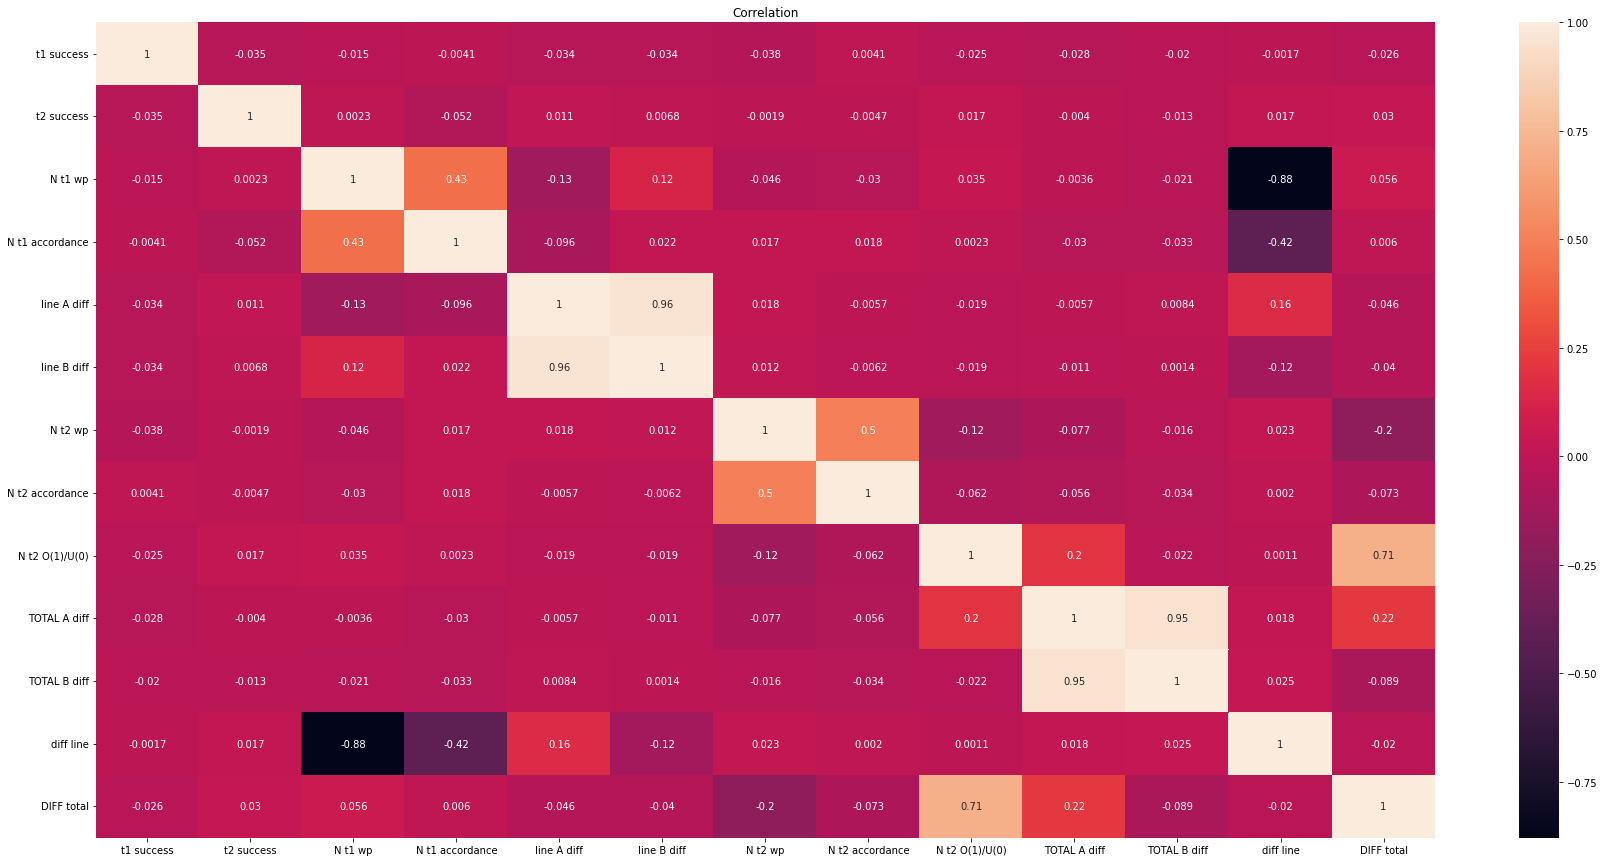

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(30,15))
sns.heatmap(train.corr(), annot=True)
plt.title("Correlation")

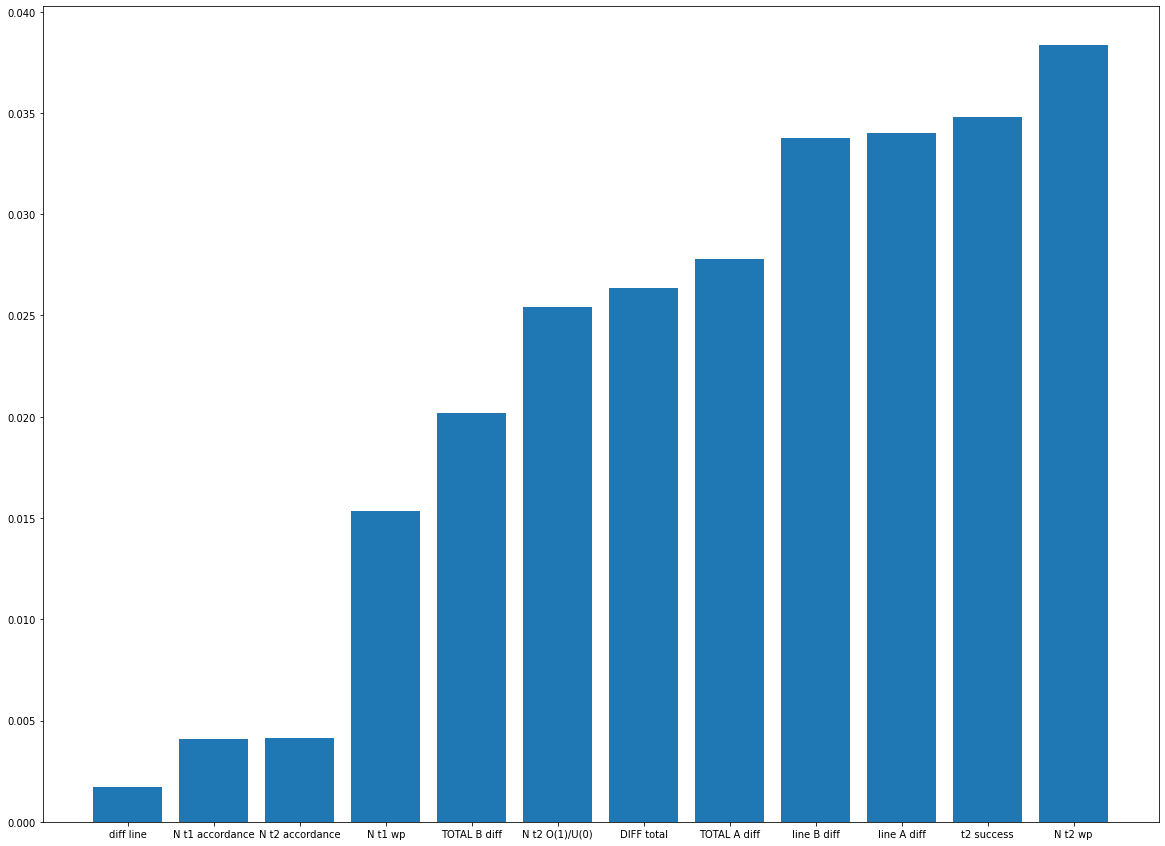

In [9]:
#t1 success에 영향을 주는 변수들
t1 = abs(train.corr()["t1 success"]).drop("t1 success").sort_values()
x = np.arange(len(t1))
plt.figure(figsize=(20,15))
plt.bar(x,t1.values)
plt.xticks(x,t1.index)
plt.show()

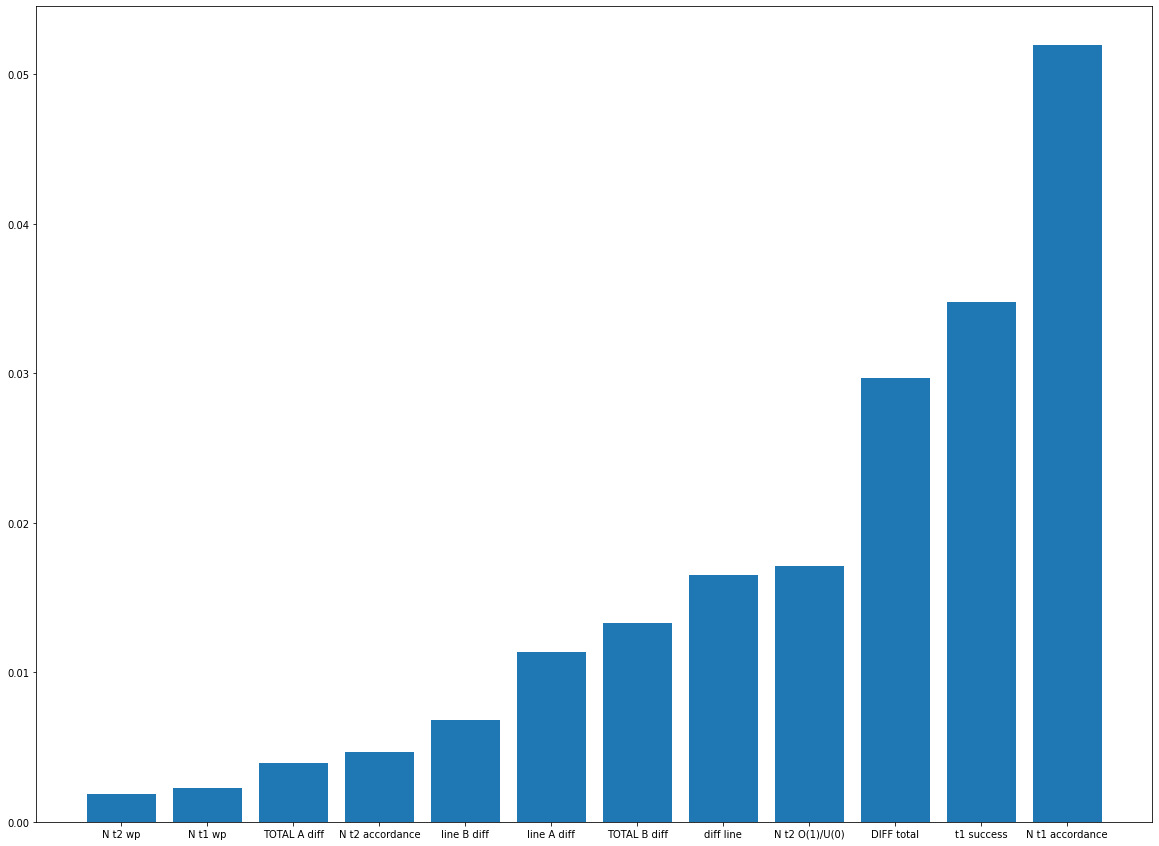

In [10]:
#t2 success에 영향을 주는 변수들
t2 = abs(train.corr()["t2 success"]).drop("t2 success").sort_values()
x = np.arange(len(t2))
plt.figure(figsize=(20,15))
plt.bar(x,t2.values)
plt.xticks(x,t2.index)
plt.show()

정규성 확인 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


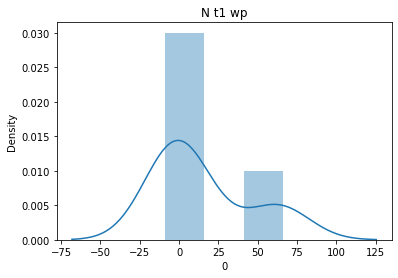

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


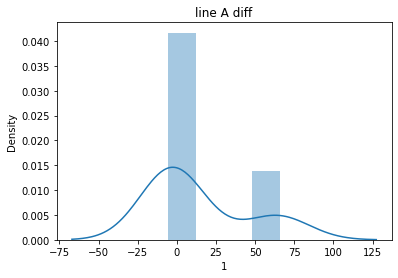

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


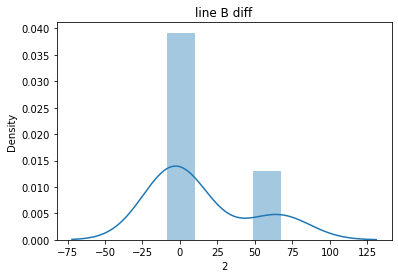

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


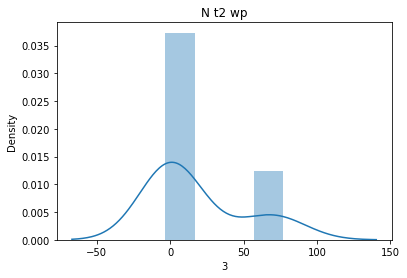

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


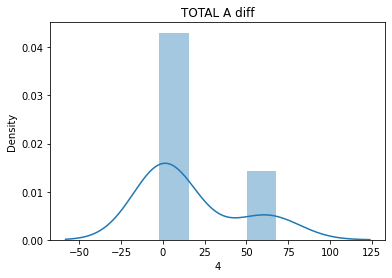

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


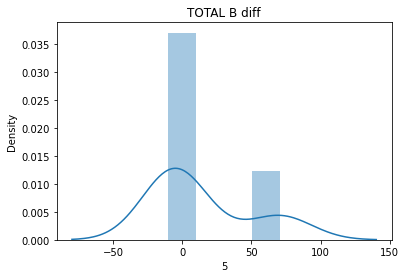

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


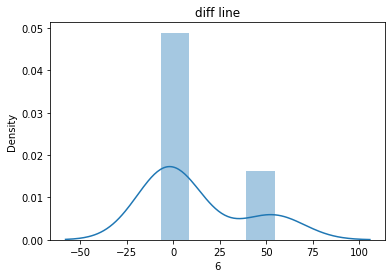

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


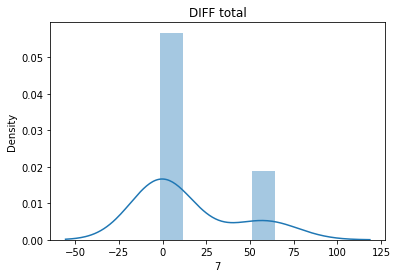

In [12]:
# 설명 변수들의 분포를 확인하며 정규성을 띄는지 확인 

#column split
ordinal_col =["N t2 accordance","N t1 accordance","N t2 O(1)/U(0)"]
numeric_col = X_train.columns.drop(ordinal_col)
dfX = pd.DataFrame(X_train.drop(ordinal_col,axis =1))
dfy = pd.DataFrame(y1_train)
feature_names = dfX.columns

for i in range(dfX.shape[1]):
    sns.distplot(dfX.iloc[i])
    plt.title(feature_names[i])
    plt.show()

데이터 스케일링

In [27]:
from sklearn.preprocessing import StandardScaler

#스케일링 적용
scaler = StandardScaler()
X_train.loc[:,numeric_col] = scaler.fit_transform(X_train.loc[:,numeric_col])
X_test.loc[:,numeric_col] = scaler.fit_transform(X_test.loc[:,numeric_col])
X_train

,N t1 wp,N t1 accordance,line A diff,line B diff,N t2 wp,N t2 accordance,N t2 O(1)/U(0),TOTAL A diff,TOTAL B diff,diff line,DIFF total
0,-0.179605,1,2.169100,2.176312,0.606637,1,0,-1.194884,-0.855182,0.023993,-1.170333
1,-0.179605,1,-0.934243,-0.893680,1.098892,1,0,-0.390185,0.056834,-0.165310,-1.461944
2,-0.459208,1,-1.664118,-1.816407,2.411572,1,0,-0.148993,0.240365,0.502413,-1.260755
3,0.799005,1,1.389217,1.771551,1.098892,1,0,-0.231520,-0.024426,-1.325097,-0.680639
4,-0.039803,1,0.476497,0.502560,-0.049703,1,0,0.365091,0.441155,-0.081604,-0.220249
...,...,...,...,...,...,...,...,...,...,...,...
1782,-0.459208,1,0.186943,0.139681,-0.870128,0,0,0.718923,0.594043,0.172002,0.448714
1783,-0.459208,1,-0.809580,-0.889977,-1.198298,0,1,-1.489238,-1.658582,0.266811,0.445656
1784,-0.319406,1,-0.952762,-1.225813,0.442552,1,1,-0.685780,-1.047659,0.947243,1.117311
1785,1.917417,1,0.176284,0.393667,0.606637,1,1,-1.013624,-1.574049,-0.767431,1.733526


#t1 success 학습 모델링

학습데이터 정의 및 파라미터 셋팅

In [28]:
from sklearn.model_selection import train_test_split
X_train_t1 = X_train.drop("diff line",axis=1)
X_train_split, X_valid, y1_train_split, y1_valid = train_test_split(X_train_t1, y1_train, random_state=1, test_size = 0.2)

#모델 학습
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV

#모델 및 변수 정의
model = XGBClassifier()
X_model = X_train_split
y_model = y1_train_split
X_valid = X_valid
y_valid = y1_valid

#파라미터 seting
xgb_parameters = {
 'min_child_weight': [0.5, 1, 3, 5, 8],
 'gamma': [0.2, 0.5, 1, 2],
 'subsample': [0.4, 0.6, 0.8, 1.0],
 'colsample_bytree': [0.2, 0.4, 0.6, 0.8],
 'max_depth': [4, 6, 8, 10],
 'objective': ['binary:logistic'],
 'use_label_encoder': [False]}

cv = KFold(n_splits=6)

rsv = RandomizedSearchCV(model, xgb_parameters, cv=cv, scoring='roc_auc', n_jobs=6, verbose=10)
rsv.fit(X_model.values,y_model.values)

print('final params', rsv.best_params_)
print('best score', rsv.best_score_)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
final params {'use_label_encoder': False, 'subsample': 0.8, 'objective': 'binary:logistic', 'min_child_weight': 3, 'max_depth': 4, 'gamma': 2, 'colsample_bytree': 0.4}
best score 0.5227491957878369


모델 평가

t1 success ROC AUC 값 : 0.4935


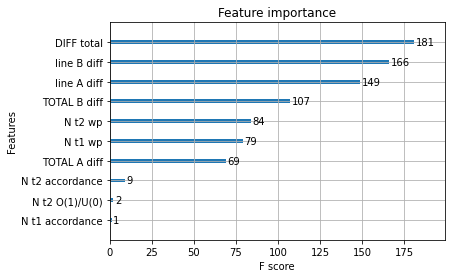

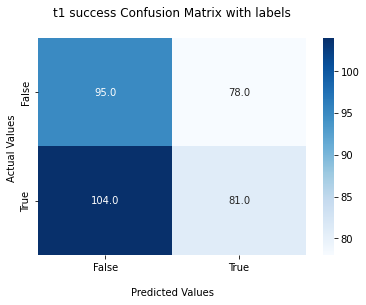

In [29]:
import xgboost
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
estimator_t1 = XGBClassifier(use_label_encoder= False, subsample= 1.0, objective= 'binary:logistic', min_child_weight= 3, max_depth= 4, gamma=1 , colsample_bytree= 0.8)#높은성능의 파라미터 설정
estimator_t1.fit(X_model,y_model)
pred_xgb = estimator_t1.predict(X_valid)

roc_score = roc_auc_score(y_valid, pred_xgb)
print('t1 success ROC AUC 값 : {0:.4f}'.format(roc_score))

#모델의 변수별 중요도 계산
xgboost.plot_importance(estimator_t1)
plt.show()

#confusion matrix
cf_matrix = confusion_matrix(y_valid, pred_xgb)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".1f")
ax.set_title('t1 success Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

#t2 success 학습 모델링

학습데이터 정의 및 파라미터 셋팅

In [17]:
from sklearn.model_selection import train_test_split
X_train_split, X_valid, y2_train_split, y2_valid = train_test_split(X_train, y2_train, random_state=1, test_size = 0.2)

#모델 학습
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV

#모델 및 변수 정의
model = XGBClassifier()
X_model = X_train_split
y_model = y2_train_split
X_valid= X_valid
y_valid= y2_valid

#파라미터 seting
xgb_parameters = {
 'min_child_weight': [0.5, 1, 3, 5, 8],
 'gamma': [0.2, 0.5, 1, 2],
 'subsample': [0.4, 0.6, 0.8, 1.0],
 'colsample_bytree': [0.2, 0.4, 0.6, 0.8],
 'max_depth': [4, 6, 8, 10],
 'objective': ['binary:logistic'],
 'use_label_encoder': [False]}

cv = KFold(n_splits=6)

rsv = RandomizedSearchCV(model, xgb_parameters, cv=cv, scoring='roc_auc', n_jobs=6, verbose=10)
rsv.fit(X_model.values,y_model.values)

print('final params', rsv.best_params_)
print('best score', rsv.best_score_)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
final params {'use_label_encoder': False, 'subsample': 0.4, 'objective': 'binary:logistic', 'min_child_weight': 8, 'max_depth': 8, 'gamma': 2, 'colsample_bytree': 0.8}
best score 0.5115123706383069


모델 평가

t2 success ROC AUC 값 : 0.5143


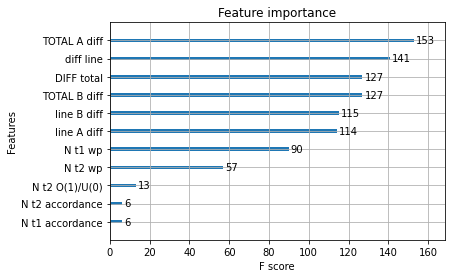

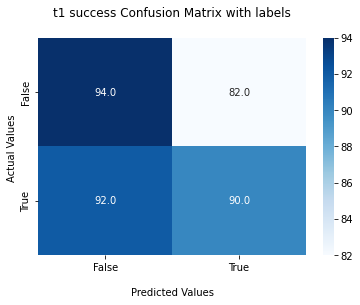

In [18]:
import xgboost
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
estimator_t2 = rsv.best_estimator_
estimator_t2.fit(X_model,y_model)
pred_xgb = estimator_t2.predict(X_valid)

roc_score = roc_auc_score(y_valid, pred_xgb)
print('t2 success ROC AUC 값 : {0:.4f}'.format(roc_score))

#모델의 변수별 중요도 계산
xgboost.plot_importance(estimator_t2)
plt.show()

#confusion matrix
cf_matrix = confusion_matrix(y_valid, pred_xgb)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt=".1f")
ax.set_title('t1 success Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

test set에 적용

In [30]:
estimator_t1.fit(X_train,y1_train)
pred_xgb_t1 = estimator_t1.predict_proba(X_test)
estimator_t2.fit(X_train,y2_train)
pred_xgb_t2 = estimator_t2.predict_proba(X_test)
test["t1 success"] = pred_xgb_t1
test["t2 success"] = pred_xgb_t2
print(test)

      t1 success  t2 success    N t1 wp  ...  TOTAL B diff  diff line  DIFF total
1787    0.579185    0.249912  70.769231  ...     -6.183982  -1.792543    1.848230
1788    0.783637    0.712297  70.769231  ...     14.014038  -1.160199   -0.083409
1789    0.699394    0.620269  79.230769  ...      4.866850  -2.377484    0.015724
1790    0.515087    0.608369  66.923077  ...      8.185824  -2.915500   -1.937229
1791    0.320038    0.495603  92.307692  ...      0.765846  -3.031462   -0.367328
1792    0.589916    0.446949  66.923077  ...     -9.980660  -1.522925    1.238451

[6 rows x 13 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
